In [259]:
#Unsupervised learning assignment
#load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.compose import make_column_transformer

In [260]:
#load the data set
df_test = pd.read_csv("Customer_Test.csv")
df_train = pd.read_csv("Customer_Train.csv")

In [261]:
df_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [262]:
df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [263]:
#understand the data 
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [264]:
df_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [265]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [266]:
df_test.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [267]:
df_test["Family_Size"] = df_test["Family_Size"].astype("Int64")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   Int64  
 9   Var_1            2595 non-null   object 
dtypes: Int64(1), float64(1), int64(2), object(6)
memory usage: 207.9+ KB


In [268]:
df_train["Family_Size"] = df_train["Family_Size"].astype("Int64")
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   Int64  
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: Int64(1), float64(1), int64(2), object(7)
memory usage: 701.4+ KB


Ever_Married
No     3285
Yes    4643
dtype: int64

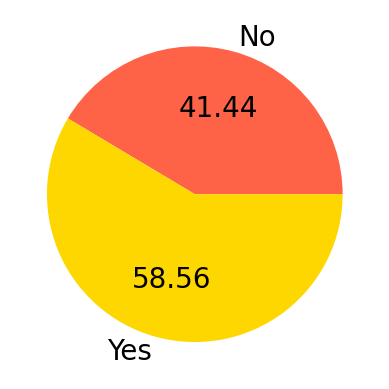

In [269]:
df_train.groupby('Ever_Married').size().plot(kind='pie', textprops={'fontsize': 20}, colors=['tomato', 'gold'], autopct='%.2f')
df_train.groupby("Ever_Married").size()

Graduated
No     3022
Yes    4968
dtype: int64

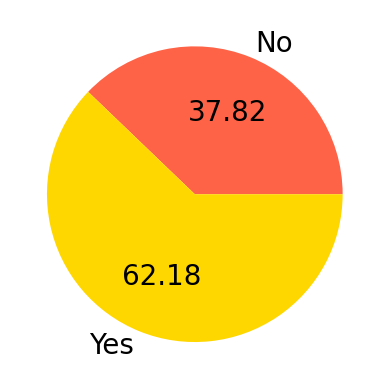

In [270]:
df_train.groupby('Graduated').size().plot(kind='pie', textprops={'fontsize': 20}, colors=['tomato', 'gold'], autopct='%.2f')
df_train.groupby("Graduated").size()

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Work_Experience'}>,
        <Axes: title={'center': 'Family_Size'}>]], dtype=object)

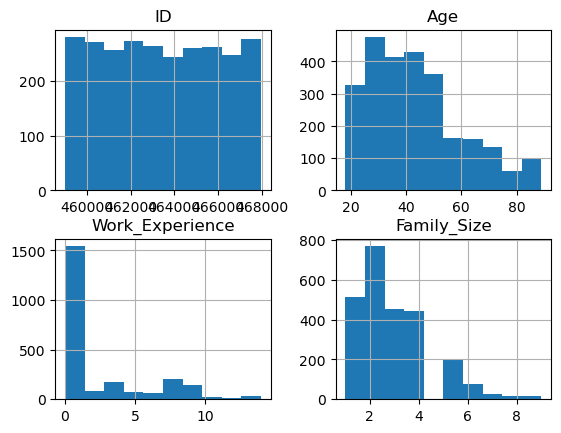

In [271]:
# Data exploration - numerical
df_test.hist()

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Work_Experience'}>,
        <Axes: title={'center': 'Family_Size'}>]], dtype=object)

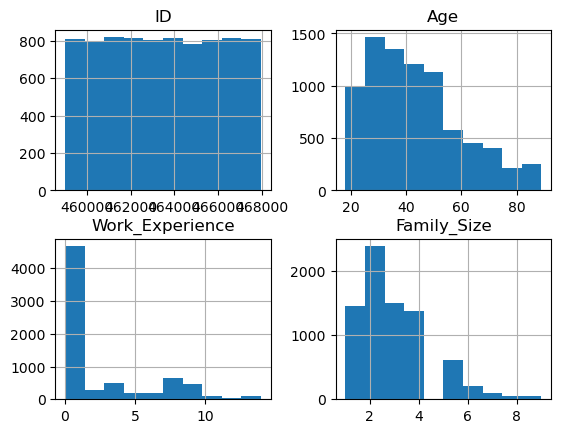

In [272]:
df_train.hist()

In [273]:
#train outliers
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(df_train[["Age", "Work_Experience", "Family_Size"]])
non_outliers_count = []
outliers_count = []
for column in outliers:
    non_outliers_count.append(outliers[column].value_counts(dropna=True).sum())
    outliers_count.append(outliers[column].isnull().sum())

non_outliers_count = pd.DataFrame(non_outliers_count)
outliers_count = pd.DataFrame(outliers_count)
outliers_var = pd.concat([outliers_count, non_outliers_count], axis = 1, keys = ["Non_outliers", "Outliers"])
outliers_var.columns = outliers_var.columns.droplevel(-1)
outliers_var = outliers_var.T
outliers_var.columns= df_train[["Age", "Work_Experience", "Family_Size"]].columns.values
outliers_var

,Age,Work_Experience,Family_Size
Non_outliers,7997,7879,7974
Outliers,71,189,94


In [274]:
#test outliers
outliers = find_outliers_IQR(df_test[["Age", "Work_Experience", "Family_Size"]])
non_outliers_count = []
outliers_count = []
for column in outliers:
    non_outliers_count.append(outliers[column].value_counts(dropna=True).sum())
    outliers_count.append(outliers[column].isnull().sum())

non_outliers_count = pd.DataFrame(non_outliers_count)
outliers_count = pd.DataFrame(outliers_count)
outliers_var = pd.concat([outliers_count, non_outliers_count], axis = 1, keys = ["Non_outliers", "Outliers"])
outliers_var.columns = outliers_var.columns.droplevel(-1)
outliers_var = outliers_var.T
outliers_var.columns= df_test[["Age", "Work_Experience", "Family_Size"]].columns.values
outliers_var

,Age,Work_Experience,Family_Size
Non_outliers,2608,2569,2596
Outliers,19,58,31


C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local

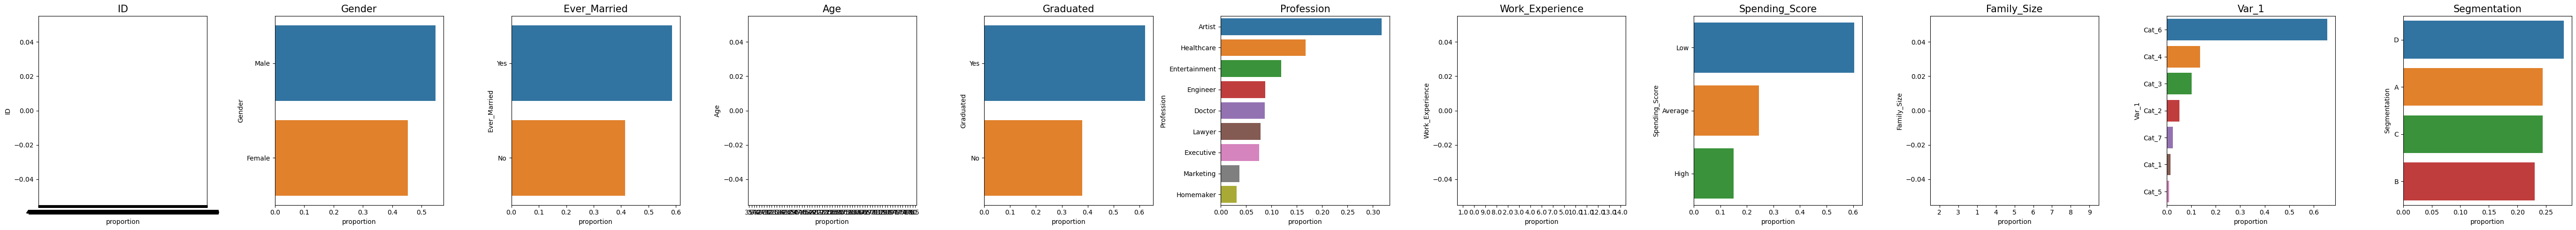

In [275]:
def UVA_category(data, var_group, hue_var = None):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (5*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    if hue_var:
      sns.countplot(y = i, hue =hue_var, data = data)
      plt.xlabel('count', fontsize = 10)
    else:
      sns.barplot(x=norm_count, y=norm_count.index, order=norm_count.index)
      plt.xlabel('proportion', fontsize = 10)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title(f"{i}", fontsize = 15)
    plt.tight_layout()

UVA_category(df_train, df_train.columns)

C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local

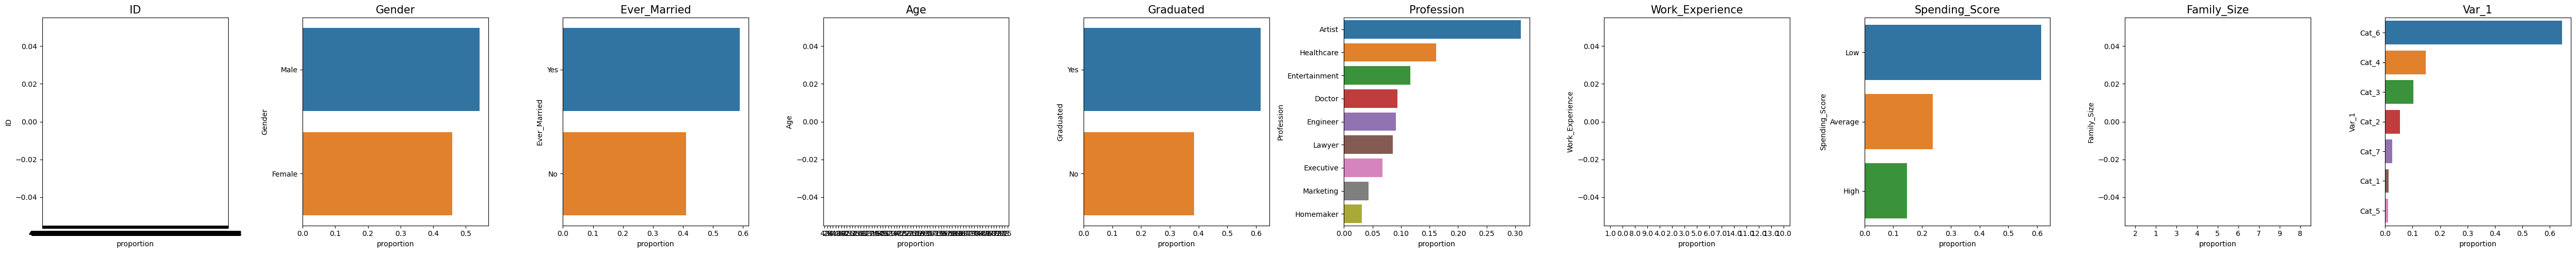

In [276]:
UVA_category(df_test, df_test.columns)

In [277]:
#dealing with missing values in the training set
df_train["Family_Size"] = df_train["Family_Size"].fillna(df_train["Family_Size"].median(skipna= True)) #replacing family size with the median
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

In [278]:
print("Median: {}, Mean: {}".format(
    df_train["Work_Experience"].median(skipna= True),
    df_train["Work_Experience"].mean(skipna= True)))

Median: 1.0, Mean: 2.641663213150988


In [279]:
df_train["Work_Experience"] = df_train["Work_Experience"].fillna(df_train["Work_Experience"].median(skipna= True))
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

In [280]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [281]:
df_train.drop(columns = ["ID", "Var_1", "Segmentation"],inplace=True)

In [282]:
df_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3
2,Female,Yes,67,Yes,Engineer,1.0,Low,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2
4,Female,Yes,40,Yes,Entertainment,1.0,High,6
...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5
8064,Male,No,35,No,Executive,3.0,Low,4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1
8066,Female,No,27,Yes,Healthcare,1.0,Low,4


In [283]:
df_train['Gender'] = df_train['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,No,22,No,Healthcare,1.0,Low,4
1,0,Yes,38,Yes,Engineer,1.0,Average,3
2,0,Yes,67,Yes,Engineer,1.0,Low,1
3,1,Yes,67,Yes,Lawyer,0.0,High,2
4,0,Yes,40,Yes,Entertainment,1.0,High,6
...,...,...,...,...,...,...,...,...
8062,1,Yes,41,Yes,Artist,0.0,High,5
8064,1,No,35,No,Executive,3.0,Low,4
8065,0,No,33,Yes,Healthcare,1.0,Low,1
8066,0,No,27,Yes,Healthcare,1.0,Low,4


In [284]:
df_train['Ever_Married'] = df_train['Ever_Married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,No,Healthcare,1.0,Low,4
1,0,1,38,Yes,Engineer,1.0,Average,3
2,0,1,67,Yes,Engineer,1.0,Low,1
3,1,1,67,Yes,Lawyer,0.0,High,2
4,0,1,40,Yes,Entertainment,1.0,High,6
...,...,...,...,...,...,...,...,...
8062,1,1,41,Yes,Artist,0.0,High,5
8064,1,0,35,No,Executive,3.0,Low,4
8065,0,0,33,Yes,Healthcare,1.0,Low,1
8066,0,0,27,Yes,Healthcare,1.0,Low,4


In [285]:
df_train['Graduated'] = df_train['Graduated'].apply(lambda x: 1 if x == 'Yes' else 0)
df_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,Healthcare,1.0,Low,4
1,0,1,38,1,Engineer,1.0,Average,3
2,0,1,67,1,Engineer,1.0,Low,1
3,1,1,67,1,Lawyer,0.0,High,2
4,0,1,40,1,Entertainment,1.0,High,6
...,...,...,...,...,...,...,...,...
8062,1,1,41,1,Artist,0.0,High,5
8064,1,0,35,0,Executive,3.0,Low,4
8065,0,0,33,1,Healthcare,1.0,Low,1
8066,0,0,27,1,Healthcare,1.0,Low,4


In [286]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output= False)
p = pd.DataFrame(df_train["Profession"])
Prof_ohe = pd.DataFrame(ohe.fit_transform(p), columns = ohe.get_feature_names_out(["Profession"]))
df_train = pd.concat([df_train.reset_index(), Prof_ohe.reset_index()], axis = 1)
df_train.drop(columns = ["index", "Profession"], inplace=True)
df_train

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0,22,0,1.0,Low,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,38,1,1.0,Average,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,67,1,1.0,Low,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,67,1,0.0,High,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,40,1,1.0,High,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,1,1,41,1,0.0,High,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7665,1,0,35,0,3.0,Low,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7666,0,0,33,1,1.0,Low,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7667,0,0,27,1,1.0,Low,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [287]:
df_train.replace(to_replace={'Low': 0, 'Average': 1, 'High':2}, inplace=True)
df_train

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0,22,0,1.0,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,38,1,1.0,1,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,67,1,1.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,67,1,0.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,40,1,1.0,2,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,1,1,41,1,0.0,2,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7665,1,0,35,0,3.0,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7666,0,0,33,1,1.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7667,0,0,27,1,1.0,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [288]:
rs = RobustScaler()
df_train_rs = rs.fit_transform(df_train)
df_train_rs = pd.DataFrame(df_train_rs, columns = df_train.columns)
df_train_rs

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0.0,-1.0,-0.818182,-1.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.0,0.0,-0.090909,0.0,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.0,1.227273,0.0,0.00,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.227273,0.0,-0.25,2.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.0,0.0,0.000000,0.0,0.00,2.0,1.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,0.0,0.0,0.045455,0.0,-0.25,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7665,0.0,-1.0,-0.227273,-1.0,0.50,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7666,-1.0,-1.0,-0.318182,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7667,-1.0,-1.0,-0.590909,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [289]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#Models
#Kmeans, Hcluster, PCA


In [290]:
#kmeans
K = range(2, 10)
fits = []
score = []
inertias = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(df_train_rs)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    inertias.append(model.inertia_)
    score.append(silhouette_score(df_train_rs, model.labels_, metric='euclidean'))

<Axes: >

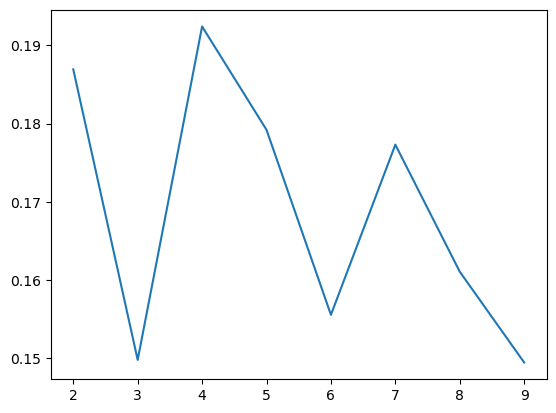

In [291]:
sns.lineplot(x = K, y = score)

<Axes: >

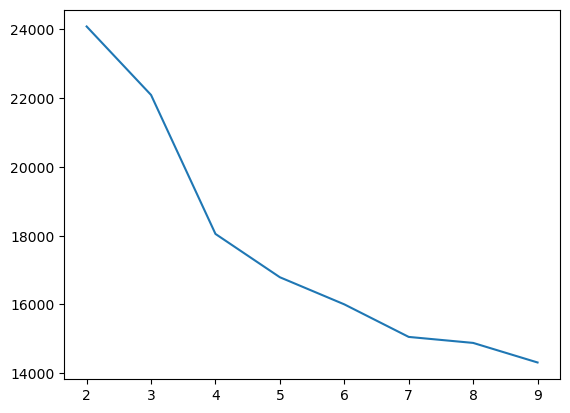

In [292]:
sns.lineplot(x = K, y = inertias)

In [293]:
model = KMeans(n_clusters=4, random_state = 32, n_init='auto')
y_pred = model.fit_predict(df_train_rs)
y_pred

array([3, 1, 0, ..., 0, 3, 1])

In [294]:
df_train_rs["cluster"] = y_pred + 1
df_train_rs

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,cluster
0,0.0,-1.0,-0.818182,-1.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
1,-1.0,0.0,-0.090909,0.0,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,-1.0,0.0,1.227273,0.0,0.00,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,1.227273,0.0,-0.25,2.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,-1.0,0.0,0.000000,0.0,0.00,2.0,1.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,0.0,0.0,0.045455,0.0,-0.25,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7665,0.0,-1.0,-0.227273,-1.0,0.50,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
7666,-1.0,-1.0,-0.318182,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
7667,-1.0,-1.0,-0.590909,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4


In [295]:
df_train_rs["cluster"].value_counts()

cluster
2    2584
1    1986
4    1696
3    1403
Name: count, dtype: int64

In [296]:
df_train_rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669 entries, 0 to 7668
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    7669 non-null   float64
 1   Ever_Married              7669 non-null   float64
 2   Age                       7669 non-null   float64
 3   Graduated                 7669 non-null   float64
 4   Work_Experience           7669 non-null   float64
 5   Spending_Score            7669 non-null   float64
 6   Family_Size               7669 non-null   float64
 7   Profession_Artist         7669 non-null   float64
 8   Profession_Doctor         7669 non-null   float64
 9   Profession_Engineer       7669 non-null   float64
 10  Profession_Entertainment  7669 non-null   float64
 11  Profession_Executive      7669 non-null   float64
 12  Profession_Healthcare     7669 non-null   float64
 13  Profession_Homemaker      7669 non-null   float64
 14  Professi

In [297]:
df_train_rs.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'cluster'],
      dtype='object')

C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local\Temp\ipykernel_4212\3527884313.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Tony\AppData\Local

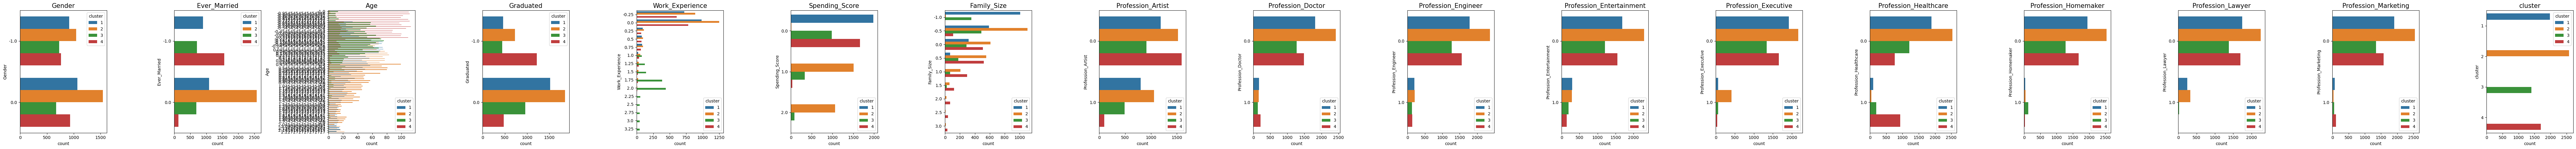

In [298]:
UVA_category(df_train_rs, df_train_rs.columns, "cluster" )